In [13]:
# data
import numpy as np
import matplotlib.pyplot as plt

def get_column(data, index):
    result = [row[index] for row in data]
    return result

data = np.genfromtxt('E:\AIO\Vectorization_For_Linear_Regression\Data\data_outlier.csv', delimiter=',').tolist()

x_data  = get_column(data, 0)
y_data = get_column(data, 1)
N = len(x_data)

print(f'areas: {x_data}')
print(f'prices: {y_data}')
print(f'data_size: {N}')

areas: [6.7, 4.6, 3.5, 5.5, 4.0]
prices: [8.6, 5.9, 4.6, 6.7, 7.2]
data_size: 5


In [14]:
#foward
#compute predict
def predict(x, w, b):
    return w*x + b

#compute loss
def compute_loss(y_hat, y):
    return (y_hat - y)**2

#compute gradient
def compute_gradient(x, y_hat, y):
    dl_dw = 2*x*(y_hat - y)
    dl_db = 2*(y_hat - y)
    return dl_dw, dl_db

#update weights
def update_weights(w, b, dl_dw, dl_db, lr):
    w = w - dl_dw*lr
    b = b - dl_db*lr
    return w, b

In [15]:
#init weihts
w = -0.34
b = 0.04
lr = 0.01

#parameters
num_epoch = 60

In [16]:
losses = []
for epoch in range(num_epoch):

    #for an epoch
    acc_loss = 0
    acc_dl_dw = 0
    acc_dl_db = 0
    for i in range(N):

        #get a sample
        x = x_data[i]
        y = y_data[i]

        #compute predict
        y_hat = predict(x, w, b)

        #compute loss
        loss = compute_loss(y_hat, y)
        acc_loss = acc_loss + loss

        #compute gradient
        dl_dw, dl_db = compute_gradient(x, y_hat, y)
        acc_dl_dw = acc_dl_dw + dl_dw
        acc_dl_db = acc_dl_db + dl_db
    
    # compute average loss
    avg_loss = acc_loss / N
    losses.append(avg_loss)

    #update weights
    w, b  = update_weights(w, b, acc_dl_dw/N, acc_dl_db/N, lr)

print(w, b)

1.2498721729253681 0.4491034841300965


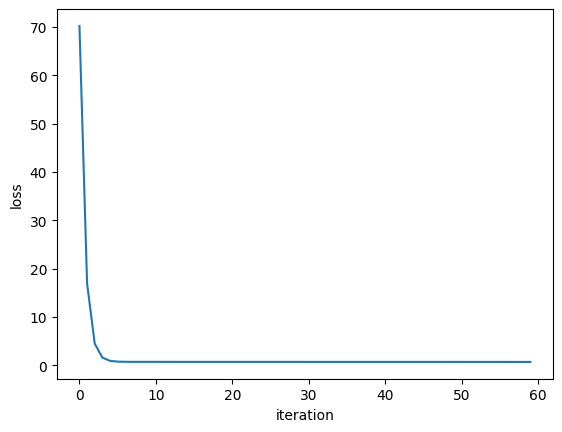

In [17]:
import matplotlib.pyplot as plt

plt.plot(losses)
plt.xlabel('iteration')
plt.ylabel('loss')
plt.show()

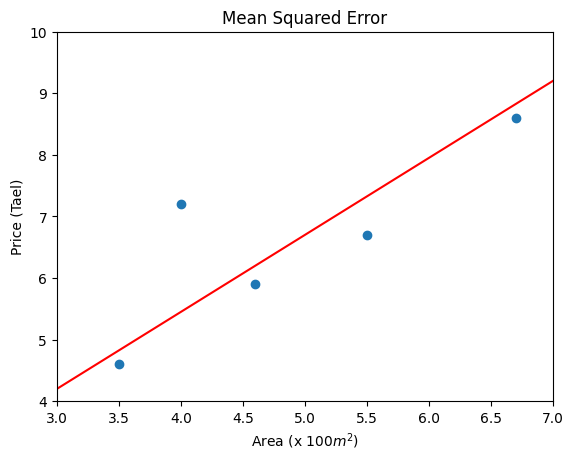

In [18]:
x_data = range(2, 8)
y_data = [x*w + b for x in x_data]
plt.plot(x_data, y_data, 'r')

data = np.genfromtxt('E:\AIO\Vectorization_For_Linear_Regression\Data\data_outlier.csv', delimiter=',').tolist()
areas  = get_column(data, 0)
prices = get_column(data, 1)
plt.scatter(areas, prices)

#--------------------------------------
plt.xlabel('Area (x 100$m^2$)')
plt.ylabel('Price (Tael)')
plt.title('Mean Squared Error')

plt.xlim(3,7)
plt.ylim(4,10)
plt.show()